In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
buoy = pd.read_fwf("/Users/matthewq/Geol_599/week8/Waves_2023.txt", sep=' ') #should have used sep = '\s+', makes it so any white space is the delimiter

In [3]:
buoy.describe()

,WSPD,GST,WVHT,DPD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,17285.0,17285.0,17285.000000,17285.000000,17285.0,17285.0,17285.000000,17285.0,17285.0,17285.0
mean,99.0,99.0,1.083535,12.161879,9999.0,999.0,17.196535,999.0,99.0,99.0
std,0.0,0.0,2.296129,4.165737,0.0,0.0,2.564664,0.0,0.0,0.0
min,99.0,99.0,0.330000,2.860000,9999.0,999.0,11.800000,999.0,99.0,99.0
25%,99.0,99.0,0.730000,9.090000,9999.0,999.0,14.600000,999.0,99.0,99.0
50%,99.0,99.0,0.880000,12.500000,9999.0,999.0,17.500000,999.0,99.0,99.0
75%,99.0,99.0,1.140000,14.290000,9999.0,999.0,19.400000,999.0,99.0,99.0
max,99.0,99.0,99.000000,99.000000,9999.0,999.0,23.900000,999.0,99.0,99.0


In [4]:
buoy
#see APD and MWD are clumped into one column for some reason, not sure why

,YY MM DD hh mm WDIR,WSPD,GST,WVHT,DPD,APD MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023 01 01 00 26 999,99.0,99.0,1.12,12.50,7.69 269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023 01 01 00 56 999,99.0,99.0,1.16,11.76,7.34 272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023 01 01 01 26 999,99.0,99.0,1.20,12.50,7.08 268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023 01 01 01 56 999,99.0,99.0,1.25,10.53,7.33 268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023 01 01 02 26 999,99.0,99.0,1.27,10.53,7.57 268,9999.0,999.0,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17280,2023 12 31 21 56 999,99.0,99.0,2.01,14.29,1.19 270,9999.0,999.0,16.7,999.0,99.0,99.0
17281,2023 12 31 22 26 999,99.0,99.0,1.75,15.38,0.37 267,9999.0,999.0,16.7,999.0,99.0,99.0
17282,2023 12 31 22 56 999,99.0,99.0,1.79,13.33,0.50 268,9999.0,999.0,16.8,999.0,99.0,99.0
17283,2023 12 31 23 26 999,99.0,99.0,1.66,14.29,0.32 271,9999.0,999.0,16.8,999.0,99.0,99.0


In [5]:
#pull out columns needed 
buoy_new = buoy[['WVHT', 'DPD', 'APD MWD', 'WTMP']].copy()

In [6]:
print(buoy_new)

       WVHT    DPD   APD MWD  WTMP
0      1.12  12.50  7.69 269  15.3
1      1.16  11.76  7.34 272  15.3
2      1.20  12.50  7.08 268  15.3
3      1.25  10.53  7.33 268  15.4
4      1.27  10.53  7.57 268  15.5
...     ...    ...       ...   ...
17280  2.01  14.29  1.19 270  16.7
17281  1.75  15.38  0.37 267  16.7
17282  1.79  13.33  0.50 268  16.8
17283  1.66  14.29  0.32 271  16.8
17284  1.70  12.50  0.54 271  16.9

[17285 rows x 4 columns]


In [7]:
#APD and MWD are clumped into one column, need to separate them. 
#separated by spaces, but produces 3 columns (one just saying None) when values are pulled apart based on space
buoy_new[['APD', 'MWD', 'None']] = buoy_new['APD MWD'].str.split(' ', expand=True)
print(buoy_new)

       WVHT    DPD   APD MWD  WTMP   APD  MWD  None
0      1.12  12.50  7.69 269  15.3  7.69  269  None
1      1.16  11.76  7.34 272  15.3  7.34  272  None
2      1.20  12.50  7.08 268  15.3  7.08  268  None
3      1.25  10.53  7.33 268  15.4  7.33  268  None
4      1.27  10.53  7.57 268  15.5  7.57  268  None
...     ...    ...       ...   ...   ...  ...   ...
17280  2.01  14.29  1.19 270  16.7  1.19  270  None
17281  1.75  15.38  0.37 267  16.7  0.37  267  None
17282  1.79  13.33  0.50 268  16.8  0.50  268  None
17283  1.66  14.29  0.32 271  16.8  0.32  271  None
17284  1.70  12.50  0.54 271  16.9  0.54  271  None

[17285 rows x 7 columns]


In [8]:
#making a new dataframe that only has the columns we want for our regressors
buoy_use = buoy_new[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']].copy()
print(buoy_use)

       WVHT    DPD   APD  MWD  WTMP
0      1.12  12.50  7.69  269  15.3
1      1.16  11.76  7.34  272  15.3
2      1.20  12.50  7.08  268  15.3
3      1.25  10.53  7.33  268  15.4
4      1.27  10.53  7.57  268  15.5
...     ...    ...   ...  ...   ...
17280  2.01  14.29  1.19  270  16.7
17281  1.75  15.38  0.37  267  16.7
17282  1.79  13.33  0.50  268  16.8
17283  1.66  14.29  0.32  271  16.8
17284  1.70  12.50  0.54  271  16.9

[17285 rows x 5 columns]


Using these data, train models to predict wave height as a function of dominant wave
period, average wave period, the direction from which the waves at the dominant
period are coming, and sea surface temperature

1. Fit a decision tree regressor and random forest regressor with 25 trees. Compare with a baseline linear model of your choice. Which model performs best? Report performance on the training, validation, and test dataset.
2. What cost function are you using for each model?
3. What (if any) hyperparameters did you optimize?
4. If you redo your train/validation splits, do you get the same answers?
5. Train a random forest model on this prediction task with a 2, 10, 25, 50, 100, 250, 500, & 1,000 trees. Plot the training and validation error as a function of number of trees.
6. Do you have evidence of overfitting to the training dataset with 1,000 trees?

In [9]:
#kept getting "ValueError: could not convert string to float: ''" when running decision tree so went in excel to turn all values into numbers
buoy_use.to_excel("buoy_use.xlsx") 
buoy_use = pd.read_csv("/Users/matthewq/Geol_599/week8/buoy_use.csv")
print(buoy_use)

       WVHT    DPD   APD    MWD  WTMP
0      1.12  12.50  7.69  269.0  15.3
1      1.16  11.76  7.34  272.0  15.3
2      1.20  12.50  7.08  268.0  15.3
3      1.25  10.53  7.33  268.0  15.4
4      1.27  10.53  7.57  268.0  15.5
...     ...    ...   ...    ...   ...
17280  2.01  14.29  1.19  270.0  16.7
17281  1.75  15.38  0.37  267.0  16.7
17282  1.79  13.33  0.50  268.0  16.8
17283  1.66  14.29  0.32  271.0  16.8
17284  1.70  12.50  0.54  271.0  16.9

[17285 rows x 5 columns]


In [10]:
#find and drop any Na values
buoy_use.isna().sum()

WVHT     0
DPD      0
APD      0
MWD     10
WTMP     0
dtype: int64

In [11]:
buoy_use = buoy_use.dropna()
buoy_use.isna().sum()

WVHT    0
DPD     0
APD     0
MWD     0
WTMP    0
dtype: int64

In [12]:
X = buoy_use[["DPD", "APD", "MWD", 'WTMP']].to_numpy()
y = buoy_use[['WVHT']]

In [13]:
from sklearn.model_selection import train_test_split
#Splitting data set - test = 10% of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17)

In [34]:
DTrg = DecisionTreeRegressor()
DTrg.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [36]:
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
DT_mse_val = mean_squared_error(DT_ypred_val, y_val)

print(DT_mse_test)
print(DT_mse_train)
print(DT_mse_val)

0.15908682002314814
1.4131277123372605e-05
0.17446704502459326


Changing max depth to get lowest MSE

In [37]:
DTrg = DecisionTreeRegressor(max_depth = 2)
DTrg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [38]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [39]:
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
DT_mse_val = mean_squared_error(DT_ypred_val, y_val)

print(DT_mse_test)
print(DT_mse_train)
print(DT_mse_val)

0.2502671371679493
0.228387688791217
0.2225583506727359


In [40]:
DTrg = DecisionTreeRegressor(max_depth = 5)
DTrg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [41]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [42]:
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
DT_mse_val = mean_squared_error(DT_ypred_val, y_val)

print(DT_mse_test)
print(DT_mse_train)
print(DT_mse_val)

0.1700917557048622
0.1591834161741523
0.1689277666787617


In [43]:
DTrg = DecisionTreeRegressor(max_depth = 10)
DTrg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [44]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [45]:
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
DT_mse_val = mean_squared_error(DT_ypred_val, y_val)

print(DT_mse_test)
print(DT_mse_train)
print(DT_mse_val)

0.12958913338886052
0.09012142119389208
0.13231459448710134


In [46]:
DTrg = DecisionTreeRegressor(max_depth = 20)
DTrg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [47]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [48]:
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
DT_mse_val = mean_squared_error(DT_ypred_val, y_val)

print(DT_mse_test)
print(DT_mse_train)
print(DT_mse_val)

0.13834245662676395
0.011059275691654998
0.1592824892197082


Worse at 20 than at depth of 10, so using 10

In [49]:
DTrg = DecisionTreeRegressor(max_depth = 10)
DTrg.fit(X_train, y_train)

DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

In [50]:
RFrg = RandomForestRegressor(n_estimators=25)
RFrg.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=25)

In [51]:
RF_ypred_test = RFrg.predict(X_test)
RF_ypred_train = RFrg.predict(X_train)
RF_ypred_val = RFrg.predict(X_val)

In [52]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [53]:
reg_ypred_test = reg.predict(X_test)
reg_ypred_train = reg.predict(X_train)
reg_ypred_val = reg.predict(X_val)

In [54]:
#Using mean squared error cost function to evaluate performance
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
RF_mse_test = mean_squared_error(RF_ypred_test, y_test)
reg_mse_test = mean_squared_error(reg_ypred_test, y_test)

DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
RF_mse_train = mean_squared_error(RF_ypred_train, y_train)
reg_mse_train = mean_squared_error(reg_ypred_train, y_train)

DT_mse_val = mean_squared_error(DT_ypred_val, y_val)
RF_mse_val = mean_squared_error(RF_ypred_val, y_val)
reg_mse_val = mean_squared_error(reg_ypred_val, y_val)

In [55]:
MSE = ([DT_mse_test, RF_mse_test, reg_mse_test], [DT_mse_train, RF_mse_train, reg_mse_train], [DT_mse_val, RF_mse_val, reg_mse_val])
MSE

([0.1273871128488978, 0.08554226041013376, 3.02805119571834],
 [0.09012142119389208, 0.013279311136798238, 2.3075750421842147],
 [0.1325438088426317, 0.0928479702711565, 4.733150004664438])

1- The random forest regressor performs best on each data set.
2- Used Mean Squared Error as a cost function.
3- Optimized the max depth for the decision tree regressor (used a max depth of 10).

In [56]:
#resplitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17)

In [57]:
DTrg.fit(X_train, y_train)
RFrg.fit(X_train, y_train.values.ravel())
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
DT_ypred_test = DTrg.predict(X_test)
DT_ypred_train = DTrg.predict(X_train)
DT_ypred_val = DTrg.predict(X_val)

RF_ypred_test = RFrg.predict(X_test)
RF_ypred_train = RFrg.predict(X_train)
RF_ypred_val = RFrg.predict(X_val)

reg_ypred_test = reg.predict(X_test)
reg_ypred_train = reg.predict(X_train)
reg_ypred_val = reg.predict(X_val)

In [59]:
#Using mean squared error cost function to evaluate performance
DT_mse_test = mean_squared_error(DT_ypred_test, y_test)
RF_mse_test = mean_squared_error(RF_ypred_test, y_test)
reg_mse_test = mean_squared_error(reg_ypred_test, y_test)

DT_mse_train = mean_squared_error(DT_ypred_train, y_train)
RF_mse_train = mean_squared_error(RF_ypred_train, y_train)
reg_mse_train = mean_squared_error(reg_ypred_train, y_train)

DT_mse_val = mean_squared_error(DT_ypred_val, y_val)
RF_mse_val = mean_squared_error(RF_ypred_val, y_val)
reg_mse_val = mean_squared_error(reg_ypred_val, y_val)

In [60]:
MSE2 = ([DT_mse_test, RF_mse_test, reg_mse_test], [DT_mse_train, RF_mse_train, reg_mse_train], [DT_mse_val, RF_mse_val, reg_mse_val])
MSE2

([0.1204697708178334, 0.09409087086419754, 2.9132625733568704],
 [0.09377651623654844, 0.012820614858209026, 2.545181960852429],
 [0.13559402235656606, 0.10023403187852187, 3.3616428796833104])

4- There are slight differences in the MSE values after resplitting the data.

In [173]:
trees = [2, 10, 25, 50, 100, 250, 500, 1000]
print(trees)

[2, 10, 25, 50, 100, 250, 500, 1000]


In [193]:
#create empty dataframe
error = pd.DataFrame(columns=['trees', 'Training', 'Validation'])

for i in trees:
    RFrg = RandomForestRegressor(n_estimators=i)
    RFrg.fit(X_train, y_train.values.ravel())
    RF_ypred_train = RFrg.predict(X_train)
    RF_ypred_val = RFrg.predict(X_val)
    RF_mse_train = mean_squared_error(RF_ypred_train, y_train)
    RF_mse_val = mean_squared_error(RF_ypred_val, y_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, RF_mse_train, RF_mse_val]
    #adds rows of wanted variables to empty error dataframe
    error.loc[len(error)] = row
    print(i, RF_mse_train, RF_mse_val)

2 0.038249511565104706 0.11550753378946482
10 0.017888203251877108 0.08951239738764873
25 0.013813422301685144 0.08234814100469112
50 0.012748878538450381 0.07974566261980914
100 0.012164405851737335 0.07896307952028946
250 0.011896704154242764 0.0781095557781888
500 0.011794558139289887 0.07761945343483367
1000 0.011809189439906572 0.07778124184173991


In [194]:
error

,trees,Training,Validation
0,2.0,0.038250,0.115508
1,10.0,0.017888,0.089512
2,25.0,0.013813,0.082348
3,50.0,0.012749,0.079746
4,100.0,0.012164,0.078963
5,250.0,0.011897,0.078110
6,500.0,0.011795,0.077619
7,1000.0,0.011809,0.077781


<Axes: xlabel='trees', ylabel='Training'>

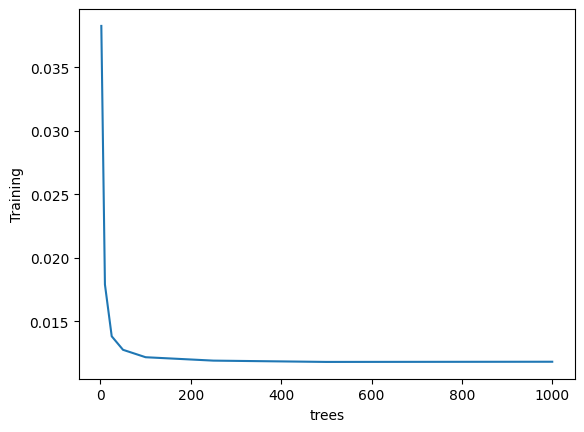

In [195]:
sns.lineplot(data=error, x="trees", y="Training")

<Axes: xlabel='trees', ylabel='Validation'>

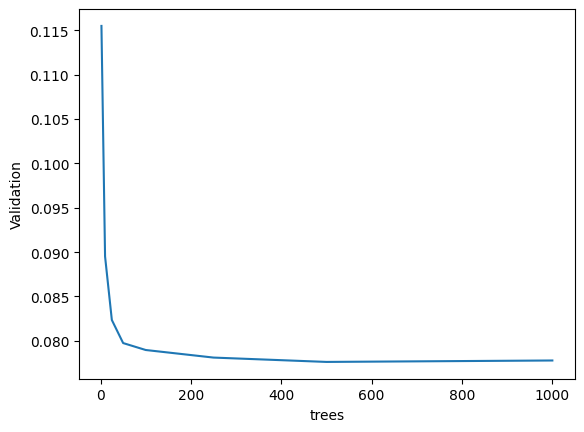

In [196]:
sns.lineplot(data=error, x="trees", y="Validation")

In [197]:
error_m = error.melt('trees', var_name='Data set', value_name='mse')
error_m

,trees,Data set,mse
0,2.0,Training,0.038250
1,10.0,Training,0.017888
2,25.0,Training,0.013813
3,50.0,Training,0.012749
4,100.0,Training,0.012164
5,250.0,Training,0.011897
6,500.0,Training,0.011795
7,1000.0,Training,0.011809
8,2.0,Validation,0.115508
9,10.0,Validation,0.089512


[Text(0.5, 0, 'Number of Trees'),
 Text(0, 0.5, 'Mean Squared Error ($ft^{2}$)')]

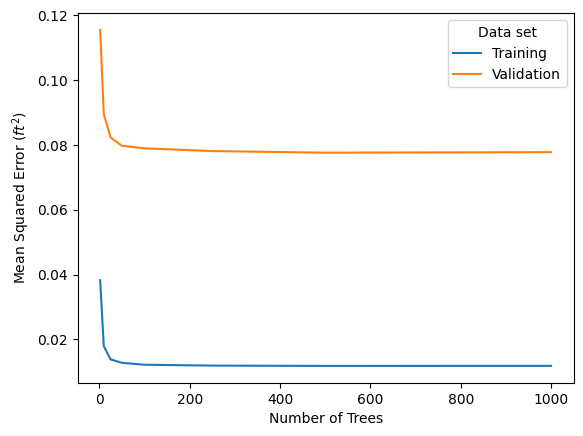

In [201]:
mse_pl = sns.lineplot(data=error_m, x="trees", y="mse", hue="Data set")
mse_pl.set(xlabel='Number of Trees', ylabel='Mean Squared Error ($ft^{2}$)')
#mse_pl.legend(title='Data set', loc='upper right', labels=['Training', 'Validation'])

6- No evidence of overfitting to training data, as the difference in training and validation set MSE is consistent throughout.